1-) Considere o problema das espirais. Sendo a espiral 1 uma classe e a espiral 2 outra
classe. Gere os dados usando as seguintes equações:
- Espiral 1:

  $x = \frac{\theta}{4}cos(\theta), ~y = \frac{\theta}{4}sen(\theta), ~\theta \geq 0$

- Espiral 2:

  $x = (\frac{\theta}{4} + 0.8)cos(\theta), ~y = (\frac{\theta}{4} + 0.8)sen(\theta), ~\theta \geq 0$

fazendo theta assumir 1000 valores igualmente espaçados entre 0 e 20 radianos. Solucione
este problema considerando:

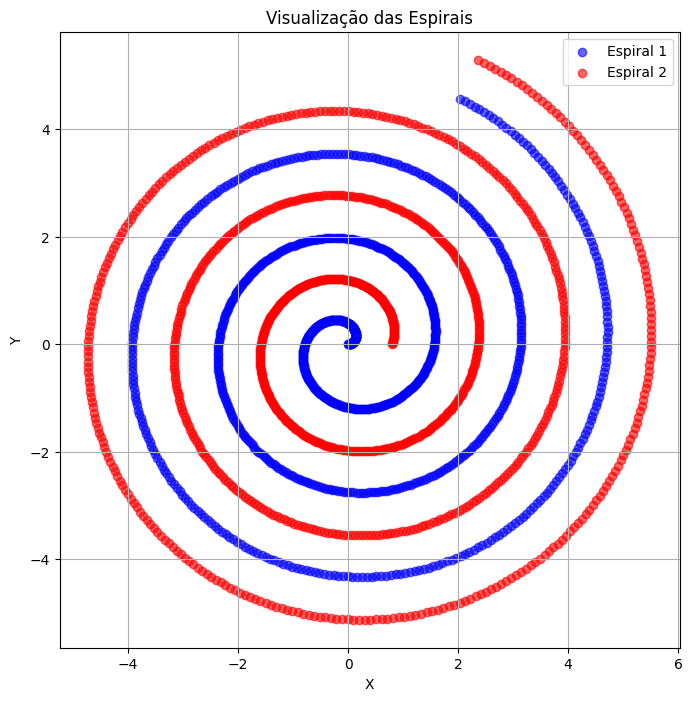

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

import numpy as np
import matplotlib.pyplot as plt

# Número de pontos
n_points = 1000

# Valores de theta igualmente espaçados entre 0 e 20 radianos
theta = np.linspace(0, 20, n_points)

# Coordenadas para a Espiral 1
x1 = (theta / 4) * np.cos(theta)
y1 = (theta / 4) * np.sin(theta)

# Coordenadas para a Espiral 2
x2 = (theta / 4 + 0.8) * np.cos(theta)
y2 = (theta / 4 + 0.8) * np.sin(theta)

# Plotando as espirais
plt.figure(figsize=(8, 8))
plt.scatter(x1, y1, c='blue', label='Espiral 1', alpha=0.6)
plt.scatter(x2, y2, c='red', label='Espiral 2', alpha=0.6)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Visualização das Espirais")
plt.legend()
plt.grid(True)
plt.show()

## a) Uma SVM

In [3]:
# Juntando os dados das espirais
X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_points), np.ones(n_points)))  # 0 para Espiral 1, 1 para Espiral 2

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo SVM
svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)

# Previsão e avaliação no conjunto de teste
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do SVM:", accuracy)

Acurácia do SVM: 0.56


# O modelo SVM conseguiu uma acurácia de 56% no conjunto de teste. Esta é uma taxa de acerto relativamente baixa, o que pode indicar que o modelo teve dificuldades para separar adequadamente as duas espirais usando o kernel RBF padrão.

In [4]:
# Juntando os dados das espirais
X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_points), np.ones(n_points)))  # 0 para Espiral 1, 1 para Espiral 2

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo SVM
svm_model = SVC(kernel='rbf', gamma=5)
svm_model.fit(X_train, y_train)

# Previsão e avaliação no conjunto de teste
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia do SVM:", accuracy)

Acurácia do SVM: 1.0


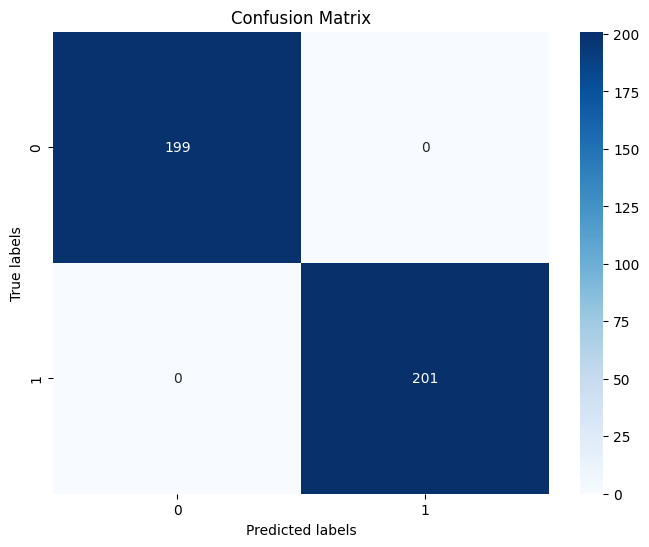

In [5]:
# Plotar a matriz de confusão com seaborn
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

## Esse ajuste no gamma permitiu que o modelo capturasse melhor a complexidade dos dados, resultando em uma classificação perfeita

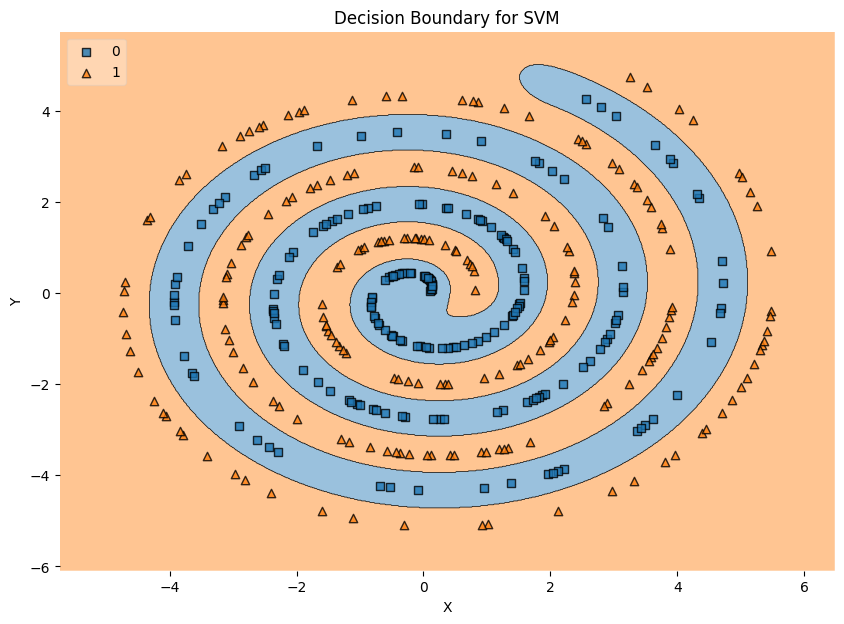

In [6]:
# Plotar as regiões de decisão
plt.figure(figsize=(10, 7))
plot_decision_regions(X_test, y_test.astype(np.int_), clf=svm_model, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary for SVM')
plt.show()

## b) Um comitê de máquina formado por uma rede perceptron de uma camada oculta, uma RBF e uma máquina de vetor de suporte (SVM)


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import VotingClassifier

# Recriando e ajustando todos os modelos para o comitê
mlp_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, random_state=42)
rbf_model = SVC(kernel='rbf' ,degree=3, gamma='auto')
svm_adjusted = SVC(kernel='rbf', gamma=5)  # Recriando o modelo SVM ajustado com gamma=5

# Treinando os modelos individualmente
mlp_model.fit(X_train, y_train)
rbf_model.fit(X_train, y_train)
svm_adjusted.fit(X_train, y_train)

# Criando o comitê de modelos com votação majoritária novamente
voting_clf_revised = VotingClassifier(
    estimators=[('mlp', mlp_model), ('rbf', rbf_model), ('svm', svm_adjusted)],
    voting='hard'
)

# Treinando o comitê novamente
voting_clf_revised.fit(X_train, y_train)

# Avaliação do comitê no conjunto de teste novamente
y_pred_committee_revised = voting_clf_revised.predict(X_test)
accuracy_committee_revised = accuracy_score(y_test, y_pred_committee_revised)

accuracy_committee_revised

0.965

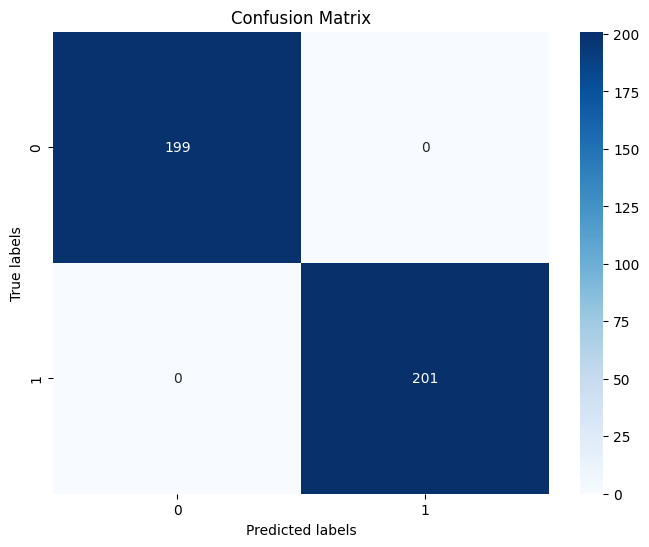

In [11]:
# Plotar a matriz de confusão com seaborn
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

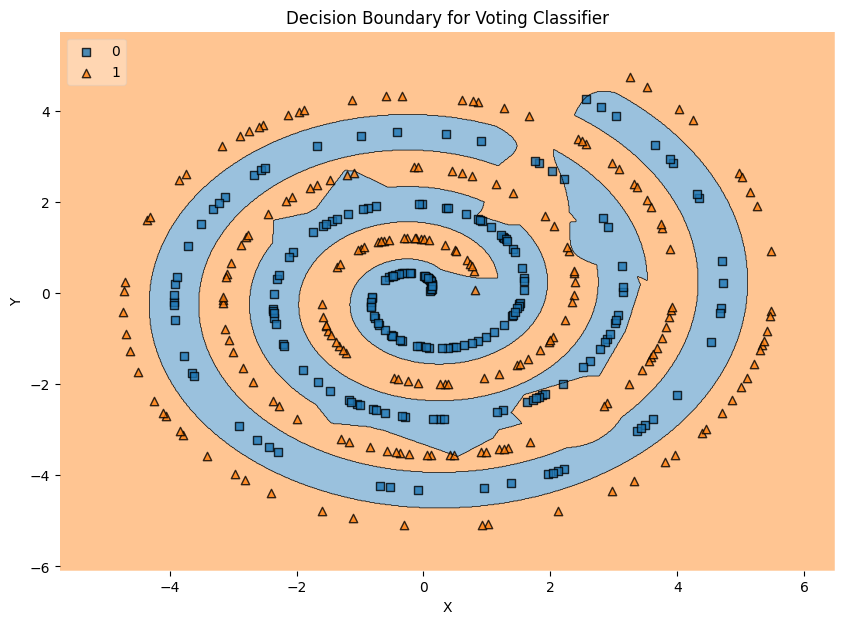

In [12]:
# Plotar as regiões de decisão
plt.figure(figsize=(10, 7))
plot_decision_regions(X_test, y_test.astype(np.int_), clf=voting_clf_revised, legend=2)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Decision Boundary for Voting Classifier')
plt.show()